In [1]:
using LinearAlgebra
dot2(x) = dot(x, x)
using Distributions
using StatsPlots
#pythonplot()
default(fmt=:png, titlefontsize=10, tickfontsize=6, guidefontsize=7)

データを生成するモデル:
$$
\begin{aligned}
& X_1 = U_1, \quad & & U_1 \sim \operatorname{Uniform}(-\sqrt{3}, \sqrt{3}) \\
& X_2 = X_1 + U_2, \quad & & U_2 \sim 10\operatorname{Uniform}(-\sqrt{3}, \sqrt{3}), \\
& Y = 1 + X_1 + X_2^2 + X_2 + U_3, \quad & & U_3 \sim \operatorname{Normal}(0, 1).
\end{aligned}
$$

推定用のモデル1:
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \sigma U, \quad U \sim \operatorname{Normal}(0, 1).
$$

推定用のモデル2
$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_1^2 + \beta_3 X_2 + \sigma U, \quad U \sim \operatorname{Normal}(0, 1).
$$

[ Info: Saved animation to D:\OneDrive\public\0041\x1x2y.gif


Plots.AnimatedGif("D:\\OneDrive\\public\\0041\\x1x2y.gif")
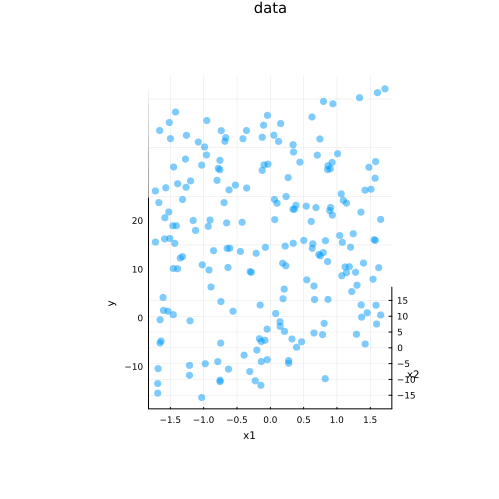

In [2]:
n = 200
x1 = rand(Uniform(-√3, √3), n)
x2 = x1 + 10rand(Uniform(-√3, √3), n)
y = @. 1 + x1 + x1^2 + x2 + randn()

anim = @animate for t in 0:3:359
    scatter(x1, x2, y; label="", title="data", msc=:auto, alpha=0.5, ms=4, camera=(t, 30))
    plot!(xguide="x1", yguide="x2", zguide="y")
    plot!(size=(500, 500))
end
gif(anim, "x1x2y.gif")

*** Y = β₀ + β₁X₁ + β₂X₂ + σU で推定 ***

(β̂0, β̂1, β̂2) = X \ y = [2.009044153598205, 0.8044742383005663, 0.996015833205102]
σ̂² = dot2(y - ŷ) / n = 1.7895573381419294

(α̂0, α̂1) = X1 \ y = [2.5707117484379496, 0.8171491372655988]
dot2(y - ŷ1) / n = 94.01339706612103

(γ̂0, γ̂1) = X2 \ y = [1.9679043316623914, 0.9961289644434993]
dot2(y - ŷ2) / n = 2.454412636480833


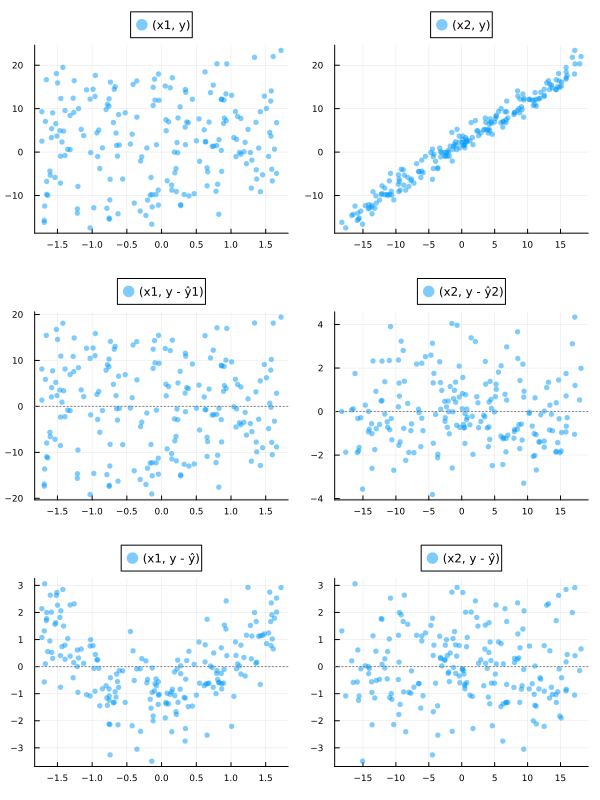

In [3]:
println("*** Y = β₀ + β₁X₁ + β₂X₂ + σU で推定 ***\n")
X = [ones(n) x1 x2]
@show β̂0, β̂1, β̂2 = X \ y
ŷ = @. β̂0 + β̂1*x1 + β̂2*x2
@show σ̂² = dot2(y - ŷ)/n
println()

X1 = [ones(n) x1]
@show α̂0, α̂1 = X1 \ y
ŷ1 = @. α̂0 + α̂1*x1
@show dot2(y - ŷ1)/n
println()

X2 = [ones(n) x2]
@show γ̂0, γ̂1 = X2 \ y
ŷ2 = @. γ̂0 + γ̂1*x2
@show dot2(y - ŷ2)/n

P1 = scatter(x1, y; label="(x1, y)", msc=:auto, alpha=0.5, ms=3)
P2 = scatter(x2, y; label="(x2, y)", msc=:auto, alpha=0.5, ms=3)

Q1 = scatter(x1, y - ŷ1; label="(x1, y - ŷ1)", msc=:auto, alpha=0.5, ms=3)
hline!([0]; label="", ls=:dot, c=:gray)
Q2 = scatter(x2, y - ŷ2; label="(x2, y - ŷ2)", msc=:auto, alpha=0.5, ms=3)
hline!([0]; label="", ls=:dot, c=:gray)

R1 = scatter(x1, y - ŷ; label="(x1, y - ŷ)", msc=:auto, alpha=0.5, ms=3)
hline!([0]; label="", ls=:dot, c=:gray)
R2 = scatter(x2, y - ŷ; label="(x2, y - ŷ)", msc=:auto, alpha=0.5, ms=3)
hline!([0]; label="", ls=:dot, c=:gray)

plot(P1, P2, Q1, Q2, R1, R2; size=(600, 800), layout=(3, 2))
plot!(legend=:outertop)

*** Y = β₀ + β₁X₁ + β₂X₁² + β₃X₂ + σU で推定 ***

(β̂0, β̂1, β̂2, β̂3) = X \ y = [0.9366101056199193, 0.9309783929982105, 1.0456388413141822, 0.9995075615645854]
ŝ² = dot2(y - ŷ) / (n - 4) = 0.8859827157639846

(α̂0, α̂1, α̂2) = X1 \ y = [1.876757495577791, 0.8991872520495303, 0.6778601005351279]
dot2(y - ŷ1) / n = 93.62573878613883

(γ̂0, γ̂1) = X2 \ y = [1.9679043316623914, 0.9961289644434993]
dot2(y - ŷ2) / n = 2.454412636480833


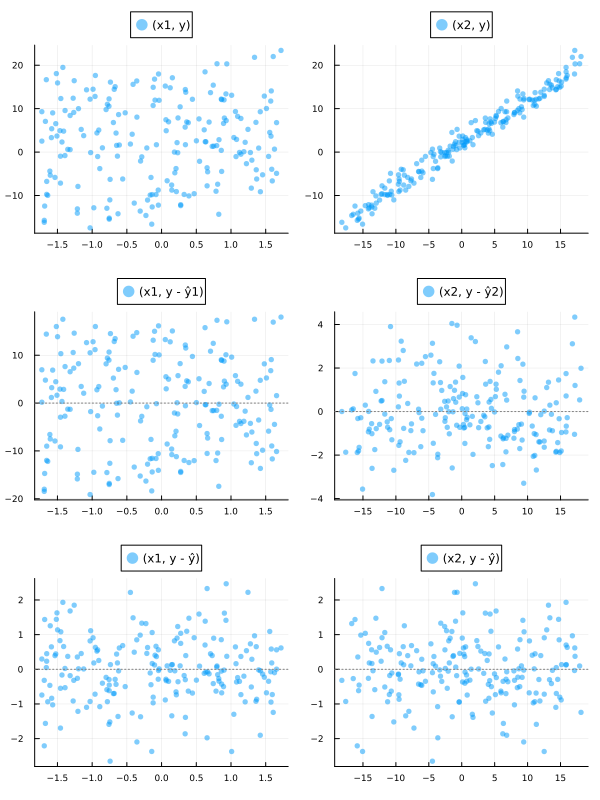

In [4]:
println("*** Y = β₀ + β₁X₁ + β₂X₁² + β₃X₂ + σU で推定 ***\n")

X = [ones(n) x1 @.(x1^2) x2]
@show β̂0, β̂1, β̂2, β̂3 = X \ y
ŷ = @. β̂0 + β̂1*x1 + β̂2*x1^2 + β̂3*x2
@show ŝ² = dot2(y - ŷ)/(n-4)
println()

X1 = [ones(n) x1 @.(x1^2)]
@show α̂0, α̂1, α̂2 = X1 \ y
ŷ1 = @. α̂0 + α̂1*x1 + α̂2*x1^2
@show dot2(y - ŷ1)/n
println()

X2 = [ones(n) x2]
@show γ̂0, γ̂1 = X2 \ y
ŷ2 = @. γ̂0 + γ̂1*x2
@show dot2(y - ŷ2)/n

P1 = scatter(x1, y; label="(x1, y)", msc=:auto, alpha=0.5, ms=3)
P2 = scatter(x2, y; label="(x2, y)", msc=:auto, alpha=0.5, ms=3)

Q1 = scatter(x1, y - ŷ1; label="(x1, y - ŷ1)", msc=:auto, alpha=0.5, ms=3)
hline!([0]; label="", ls=:dot, c=:gray)
Q2 = scatter(x2, y - ŷ2; label="(x2, y - ŷ2)", msc=:auto, alpha=0.5, ms=3)
hline!([0]; label="", ls=:dot, c=:gray)

R1 = scatter(x1, y - ŷ; label="(x1, y - ŷ)", msc=:auto, alpha=0.5, ms=3)
hline!([0]; label="", ls=:dot, c=:gray)
R2 = scatter(x2, y - ŷ; label="(x2, y - ŷ)", msc=:auto, alpha=0.5, ms=3)
hline!([0]; label="", ls=:dot, c=:gray)

plot(P1, P2, Q1, Q2, R1, R2; size=(600, 800), layout=(3, 2))
plot!(legend=:outertop)